In [ ]:
"""
# [TODO] ... ing
# kNN을 이용한 숫자 인식 — gramman 0.1 documentation  
# https://bit.ly/34WjFtl
"""
print(__doc__)

In [2]:
import sys
import glob
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [3]:
FNAME = 'images/digits.npz'
FILENAME = 'images/digits.png'


    # 가로 100개, 세로 50개로 총 5000개의 숫자가 있습니다. 
    # 각 숫자는 20x20의 해상도를 가지고 있습니다. 
    # kNN을 이용하기 위해서 학습하기와 테스트로 나눠서 진행 하겠습니다.
    


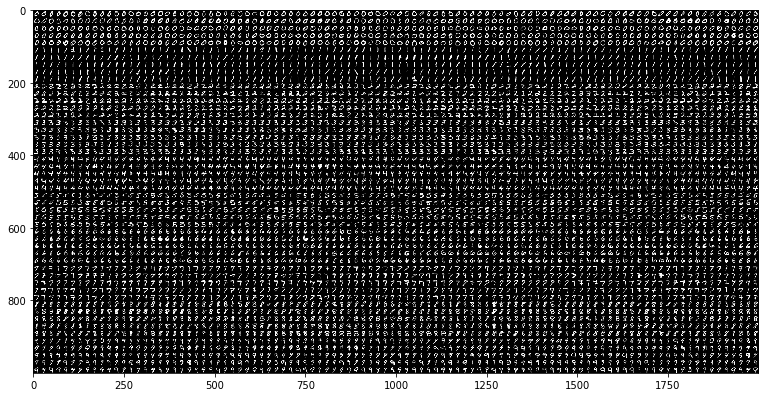

In [4]:
print(
    """
    # 가로 100개, 세로 50개로 총 5000개의 숫자가 있습니다. 
    # 각 숫자는 20x20의 해상도를 가지고 있습니다. 
    # kNN을 이용하기 위해서 학습하기와 테스트로 나눠서 진행 하겠습니다.
    """
    )

img = plt.imread(FILENAME)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_, ax = plt.subplots(1,1,figsize=(13,7))
ax.imshow(img_RGB)
plt.show()

In [5]:
# cv2.imshow('digits', img)
# cv2.waitKey()
# cv2.destroyAllWindows()

### 학습하기
> - 우선 위 이미지를 가로/세로롤 잘라서 하나의 숫자를 배열에 넣습니다.
> - 그러면 순서대로 0부터 9까지 각각 500개씩 배열에 넣어집니다.
> - 배열값이 0 ~ 499까지는 1, 500 ~ 999까지는 2 ... 4499 ~ 4999는 9를 의미하는 이미지 값이 들어가게 됩니다.
> - 그러면 500개씩 Loop를 수행하면서 각 배열에 Label작업을 합니다.
> - 그리고 이 결과값으 numpy파일로 저장을 합니다.

### 테스트
> - 학습한 numpy파일을 Load합니다.
> - 마우스나 사진으로 찍은 손글씨 숫자를 학습할 때 사용한 동일한 해상도(20X20)으로 Resize를 합니다.
> - kNN 알고리즘을 통해서 손글씩 숫자를 인식합니다.

### 재학습
> - 테스트시 실제 손글씨와 컴퓨터가 인식한 값이 다를 경우 사람이 정확한 값을 입력해 줍니다.
> - 이 값은 다시 numpy파일에 추가가 되어 재학습이 이루어 집니다.

In [6]:
def machineLearning():
    img = cv2.imread(FILENAME)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
    x = np.array(cells)
    train = x[:,:].reshape(-1,400).astype(np.float32)

    k = np.arange(10)
    train_labels = np.repeat(k,500)[:,np.newaxis]
    np.savez(FNAME,train=train,train_labels = train_labels)

def resize20(pimg):
    img = cv2.imread(pimg)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    grayResize = cv2.resize(gray,(100,100))
    ret, thresh = cv2.threshold(grayResize, 125, 255, cv2.THRESH_BINARY_INV)

    cv2.imshow('num', thresh)
    return thresh.reshape(-1,400).astype(np.float32)

def loadTrainData(fname):
    with np.load(fname) as data:
        train = data['train']
        train_labels = data['train_labels']
    return train, train_labels

def checkDigit(test, train, train_labels):
    knn = cv2.ml.KNearest_create()
    knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

    ret, result, neighbours, dist = knn.findNearest(test, k=5)
    return result

In [7]:
# to create 'digits.npz'

# len(cells)          # 50
# x.shape             # (50, 100, 20, 20)
# train.shape         # (5000, 400)
# k.shape             # (10,)
# train_labels.shape  # (5000, 1)

machineLearning()

In [8]:
glob.glob('images/num*.png')

['images\\num0.png',
 'images\\num1.png',
 'images\\num2.png',
 'images\\num3.png',
 'images\\num4.png',
 'images\\num5.png',
 'images\\num6.png',
 'images\\num7.png',
 'images\\num8.png',
 'images\\num9.png']

In [9]:
train, train_labels = loadTrainData(FNAME)
saveNpz = False

for idx, fname in enumerate(glob.glob('images/num*.png')):
    test = resize20(fname)
    result = checkDigit(test, train, train_labels)
    print(idx, result)

    k = cv2.waitKey(0)

    if k > 47 and k < 58:
        saveNpz = True
        train = np.append(train, test, axis=0)
        newLabel = np.array(int(chr(k))).reshape(-1,1)
        train_labels = np.append(train_labels, newLabel,axis=0)
        
cv2.destroyAllWindows()

if saveNpz:
    np.savez(FNAME, train=train, train_labels=train_labels)

0 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
1 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [8.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]
2 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
3 [[0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [8.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]]
4 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [6.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
5 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [3.]
 [3.]
 [3.]
 [3.]
 [5.]
 [0.]
 [0.]
 [0.]]
6 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [

In [10]:
if __name__ == '__main__':
    if len(sys.argv) == 1:
        print('option : train or test')
        exit(1)
        
    elif sys.argv[1] == 'train':
        machineLearning()
    
    elif sys.argv[1] == 'test':
        train, train_labels = loadTrainData(FNAME)
        saveNpz = False
        for fname in glob.glob('images/num*.png'):
            test = resize20(fname)
            result = checkDigit(test, train, train_labels)
            print(result)
            k = cv2.waitKey(0)
            if k > 47 and k<58:
                saveNpz = True
                train = np.append(train, test, axis=0)
                newLabel = np.array(int(chr(k))).reshape(-1,1)
                train_labels = np.append(train_labels, newLabel,axis=0)
        cv2.destroyAllWindows()
        if saveNpz:
            np.savez(FNAME,train=train, train_labels=train_labels)
    else:
        print('unknow option')

unknow option
